In [1]:
import logging

logging.basicConfig(level=logging.DEBUG)

In [1]:
import yfinance as yf
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume, TrendLine, SameAxes
from mplchart.indicators import RSI, RSIDIV
from auto_chart_patterns.trendline_patterns import TrendLineProperties
from auto_chart_patterns.rsi_div_patterns import RsiDivergenceProperties

ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="1y")

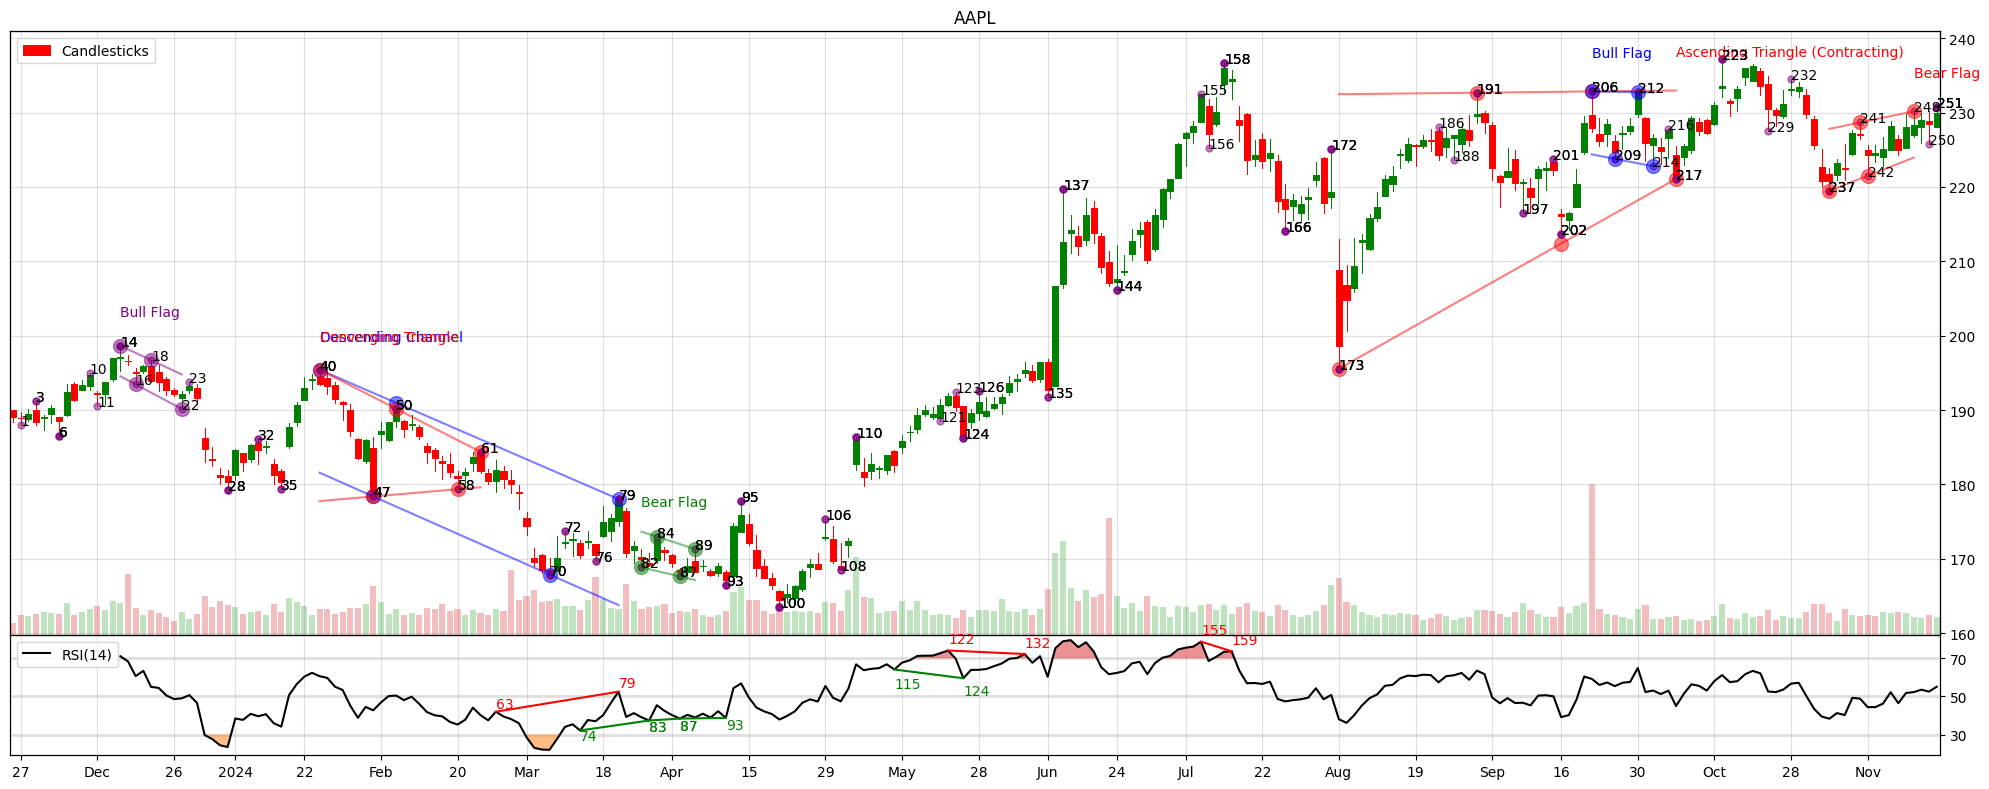

In [2]:
# Configure pattern scanning
scan_props = TrendLineProperties(
        number_of_pivots=5,
        flat_ratio=0.05,
        #align_ratio=0.2,
    )

scan_props_pf = TrendLineProperties(
        number_of_pivots=4,
)

scan_props_rsi = RsiDivergenceProperties(
    min_change_pct=0.005,
)

indicators = [
    Candlesticks(colorup="green", colordn="red"),
    Volume(),
    TrendLine(backcandles=5, forwardcandles=5, pivot_limit=50, show_pivots=True, scan_props=scan_props),
    TrendLine(backcandles=3, forwardcandles=3, pivot_limit=50, show_pivots=True, scan_props=scan_props),
    TrendLine(backcandles=2, forwardcandles=2, pivot_limit=100, show_pivots=True, scan_props=scan_props_pf),
    RSI(),
    RSIDIV(backcandles=2, forwardcandles=2, show_pivots=True, scan_props=scan_props_rsi) | SameAxes(),
    # SMA(50),
    # SMA(200),
    # MACD(),
]

chart = Chart(title=ticker, figsize=(20, 8), max_ticks=90)
chart.plot(prices, indicators)

